In [1]:
from target import poet_target
import pickle

### Select target

In [2]:
if True:
    # Perform new Gaia query
    
    # Results stored in pickle file as: prefix + t_id + '.pkl' (with ' ' -> '_')
    gs_criteria = {'Gmag':[-10., 12.], # Criteria used for selecting guide stars
                   'Umag':[-10., 10.], 
                   'Imag':[-10., 9.]}
    p1 = poet_target.Target(
                            prefix='', # Prefix used for filenames
                            t_id='AU Mic', # Target ID
                            ra=311.2897187392163,
                            dec=-31.3408994138447,
                            srch_Gmax=8., # Max Gaia G magnitude for Gaia query
                            srch_nmax=10, # Max number of Gaia sources to return
                            gs_criteria=gs_criteria, # Criteria used for selecting guide stars
                            fov_pa=0., # Position angle of CCD FoV
                            pl_model={'RpRs':[0.0496], 'P':[8.463000], 't0':[0.5], 'b':[0.18], 'aRs':[19.1]},
                            save=True,
                            )

    p1.search_gaia()
else:
    # Load saved results
    p1 = pickle.load(open('AU_Mic.pkl','rb'))

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
2 Gaia source(s) found.
No Gaia sources found within 5.00 arcsec of specified RA and DEC.
     Asigning nearest source to target.


### Modify input parameters

In [10]:
p1.nstack = 10
p1.tstart = 0.
p1.tend = 0.3
p1.exptime = 30.
p1.ccd_aperture = 5.
p1.xpad, p1.ypad = 0, 0
p1.pl_model = {'RpRs':[0.076], 'P':[3.34], 't0':[0.15], 'b':[0.3], 'aRs':[13.94]}
p1.noversample = 1
# p1.xout, p1.yout = 1024, 1024
p1.xout, p1.yout = 64,64

### Generate and plot scene

100%|██████████| 10/10 [00:00<00:00, 697.37it/s]

Generating scene...


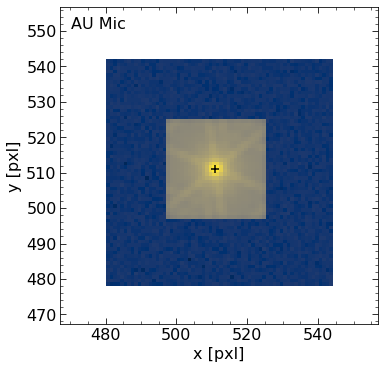

In [4]:
p1.scene_sim(reload_kernel=False)

p1.plot_fov(save_plot=True,
                plot_guide_stars=False, # Highlights identified guide stars with red boxes; default: True
                plot_bkg_stars=False, # Plot Gaia sources as points (scaled by G magnitude); default: True
                # plot_grid=False, # Plot grid lines; default: True
                add_scene_sim=True, # Default: False
            )

### Plot enclosed energy

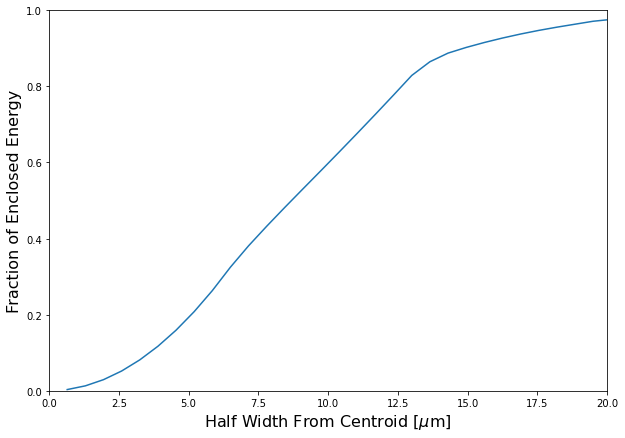

In [5]:
r_grid = np.arange(0.1,10,0.1)
x0 = p1.gaia['x'][0] + (p1.xout - p1.ccd_dim[0])/2 - 0.5
y0 = p1.gaia['y'][0] + (p1.yout - p1.ccd_dim[1])/2 + 0.5

from photutils import CircularAperture, aperture_photometry

int_e = np.zeros_like(r_grid)
for i in range(len(r_grid)):
    aperture = CircularAperture((x0, y0), r=r_grid[i])
    _ap_phot = aperture_photometry(np.abs(p1.gaia['scene']), aperture, 
                    method='exact')
    int_e[i] = float(_ap_phot['aperture_sum'])
int_e /= np.max(int_e)

fig = plt.figure(figsize=(10,7))
plt.clf()
plt.plot(r_grid * p1.detector_pixscale/2,int_e)
plt.xlim([0,20])
plt.ylim([0,1])
plt.xlabel(r'Half Width From Centroid [$\mu$m]',fontsize=16)
plt.ylabel(r'Fraction of Enclosed Energy',fontsize=16)
plt.ion()
plt.show()


In [11]:
# Generate simulated LC
p1.lc_sim()

  0%|          | 2/864 [00:00<00:43, 19.79it/s]

Generating simulated lightcurve...


100%|██████████| 864/864 [00:25<00:00, 33.98it/s]


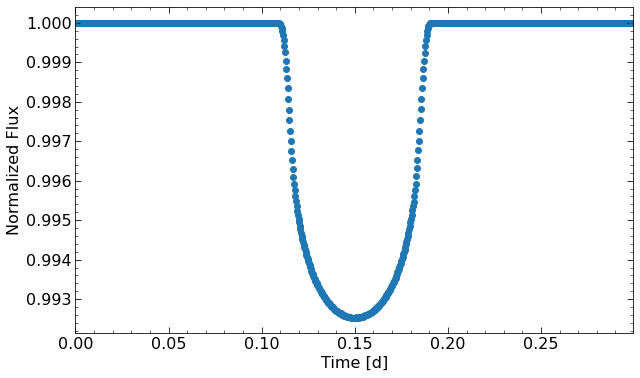

In [12]:
# Plot simulated LC
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(p1.lc_t, p1.lc_fl[:,0])
ax.errorbar(p1.lc_t, p1.lc_fl[:,0], p1.lc_err[:,0],ls='None')
ax.set_xlabel('Time [d]',fontsize=16)
ax.set_ylabel('Normalized Flux',fontsize=16)
ax.set_xlim([p1.lc_t[0], p1.lc_t[-1]])
# ax.set_xlim([0.35,0.65])

from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both',labelsize=16)
ax.tick_params(axis='both',which='major',length=6)
ax.tick_params(axis='both',which='minor',length=3)
ax.tick_params(axis='x',which='both',direction='inout')
ax.tick_params(axis='x',which='both',top=True,direction='in')
ax.tick_params(axis='y',which='both',direction='inout')
ax.tick_params(axis='y',which='both',right=True,direction='in')